# Introdução à Ciência de Dados

## Análise textual

### 1. Atividade avaliada

#### 1.a. Escolher um corpus de textos para realizar as atividades:
*O Corpus escolhido foi uma coleção completa de arquivos textos do Escritor Brasileiro Machado de Assis*

#### 1.b.  Caracterização básica do corpus:
##### processando cada arquivo e apresentando
1.       termos mais frequentes
2.       bigramas, 
3.       trigramas 

## Conclusão:

O Corpus possui 246 arquivos de texto "plano" (sem formatação), na língua nacional. O comprimento médio das palavras é de 5. (Na verdade, o comprimento médio das palavras é realmente 4, pois a variável `num_chars` inclui os caracteres de espaço). O tamanho das frases (número médio de palavras por frase) é 18 e Diversidade Léxica é 9. O Corpus possui 3.251.402 palavras e 525.173 vocábulos.  


In [3]:
import os
import pathlib
import time
import codecs
import string
import re
from collections import Counter

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import urllib
import requests
from bs4 import BeautifulSoup

import nltk
import networkx as nx
import gensim
from wordcloud import WordCloud
import textract

from IPython.core.display import Image
%matplotlib inline

O caminho dos arquivos:

In [158]:
datapath = pathlib.Path("machado")
outputs = pathlib.Path("outputs/")

Examinando os arquivos e pastas:

In [5]:
onlydirs = [f for f in os.listdir(datapath) if os.path.isdir(os.path.join(datapath,f)) and not f.startswith('.')]
onlydirs

['miscelanea',
 'romance',
 'contos',
 'traducao',
 'critica',
 'cronica',
 'teatro',
 'poesia']

In [7]:
corpuspath = datapath / 'contos'
onlyfiles = [f for f in os.listdir(corpuspath) if os.path.isfile(os.path.join(corpuspath,f)) and not f.startswith('.')]
onlydirs.sort()

print('Files in the folder:')
for i, w in enumerate(onlyfiles[0:]):
    print(i+1, '--' ,w)

Files in the folder:
1 -- macn093.txt
2 -- macn038.txt
3 -- macn103.txt
4 -- macn111.txt
5 -- macn016.txt
6 -- macn018.txt
7 -- macn104.txt
8 -- macn071.txt
9 -- macn001.txt
10 -- macn132.txt
11 -- macn068.txt
12 -- macn069.txt
13 -- macn064.txt
14 -- macn123.txt
15 -- macn130.txt
16 -- macn094.txt
17 -- macn133.txt
18 -- macn012.txt
19 -- macn032.txt
20 -- macn081.txt
21 -- macn099.txt
22 -- macn095.txt
23 -- macn059.txt
24 -- macn021.txt
25 -- macn137.txt
26 -- macn022.txt
27 -- macn106.txt
28 -- macn135.txt
29 -- macn014.txt
30 -- macn040.txt
31 -- macn028.txt
32 -- macn121.txt
33 -- macn101.txt
34 -- macn044.txt
35 -- macn086.txt
36 -- macn053.txt
37 -- macn054.txt
38 -- macn105.txt
39 -- macn129.txt
40 -- macn043.txt
41 -- macn075.txt
42 -- macn039.txt
43 -- macn020.txt
44 -- macn080.txt
45 -- macn042.txt
46 -- macn116.txt
47 -- macn055.txt
48 -- macn057.txt
49 -- macn067.txt
50 -- macn100.txt
51 -- macn124.txt
52 -- macn079.txt
53 -- macn090.txt
54 -- macn004.txt
55 -- macn109.tx

###### Criação do antidicionário (*stopwords*)

In [73]:
stop_pt = nltk.corpus.stopwords.words('portuguese')
stop_en = nltk.corpus.stopwords.words('english')
stopwords = stop_en + stop_pt
stopwords.extend(['-','', 'ã©','â', 'ã', 'l','sr','lhe','v', 'tambã©m', 'ii', 'vi', 'vii','0', '1','2','3','4','6','7','8','9','nã£o','não','ão', 'w', 'ão'])

# Calculando os cinco termos mais frequentes:

In [76]:
import glob

for file in glob.glob('machado/*/*.txt'): 
  with open(file,'r',encoding='ISO-8859-1') as f:
     texts = f.read()
     texts = texts.replace("\x97", "\n")
    
  list_words = texts.split()
  list_words = [l.strip().lower() for l in list_words]
  list_words = [l.strip(string.punctuation) for l in list_words]
  list_words = [l for l in list_words if l not in stopwords]

  freqdist = Counter(list_words)
  print(file +' --> '+str(freqdist.most_common(5)))
  
  
  

machado/miscelanea/mams01.txt --> [('povo', 14), ('mar', 10), ('tradição', 7), ('lenda', 7), ('sobre', 7)]
machado/miscelanea/mams03.txt --> [('religião', 12), ('exa', 7), ('clero', 7), ('hoje', 6), ('práticas', 5)]
machado/miscelanea/mams07.txt --> [('dr', 10), ('joão', 8), ('brígido', 8), ('certidões', 6), ('secretaria', 5)]
machado/miscelanea/mams05.txt --> [('luís', 15), ('pedro', 14), ('rio', 6), ('janeiro', 6), ('vida', 5)]
machado/miscelanea/mams02.txt --> [('mulheres', 20), ('amor', 17), ('tolos', 16), ('ser', 15), ('espírito', 15)]
machado/miscelanea/mams06.txt --> [('homem', 6), ('otaviano', 4), ('morte', 2), ('francisco', 2), ('rio', 2)]
machado/miscelanea/mams08.txt --> [('jesus', 15), ('nova', 7), ('morte', 7), ('humana', 7), ('alguma', 6)]
machado/miscelanea/mams09.txt --> [('aqui', 6), ('busto', 5), ('ex.ª', 5), ('gonçalves', 4), ('dias', 4)]
machado/miscelanea/mams04.txt --> [('sílvio-silvis', 6), ('imprensa', 3), ('acadêmica', 3), ('amigos', 3), ('duas', 3)]
machado/mi

machado/contos/macn006.txt --> [('elisiário', 60), ('casa', 57), ('tudo', 56), ('disse', 51), ('ainda', 48)]
machado/contos/macn117.txt --> [('pha-nohr', 39), ('charmion', 17), ('escriba', 16), ('dois', 13), ('casa', 13)]
machado/contos/macn082.txt --> [('luísa', 40), ('ana', 21), ('tia', 12), ('outra', 12), ('disse', 11)]
machado/contos/macn120.txt --> [('almanaques', 21), ('esperança', 16), ('tempo', 14), ('almanaque', 10), ('anos', 9)]
machado/contos/macn084.txt --> [('maria', 94), ('luísa', 93), ('rochinha', 61), ('prima', 32), ('pai', 30)]
machado/contos/macn113.txt --> [('valentim', 107), ('clarinha', 69), ('ernesto', 67), ('marido', 21), ('amor', 19)]
machado/contos/macn019.txt --> [('leonardo', 30), ('cecília', 21), ('oráculo', 20), ('atanásio', 16), ('velho', 12)]
machado/contos/macn118.txt --> [('sales', 31), ('legazinha', 13), ('idéia', 12), ('coisa', 12), ('mulher', 11)]
machado/contos/macn008.txt --> [('senhor', 10), ('x', 7), ('f', 7), ('casa', 5), ('corte', 4)]
machado/c

machado/traducao/matr03.txt --> [('disse', 718), ('oliver', 616), ('judeu', 245), ('sikes', 219), ('bumble', 206)]
machado/traducao/matr02.txt --> [('gilliatt', 776), ('mar', 389), ('homem', 312), ('água', 291), ('lethierry', 287)]
machado/traducao/matr01.txt --> [('dumont', 212), ('mathilde', 153), ('alvarez', 151), ('sra', 108), ('larcey', 100)]
machado/critica/mact28.txt --> [('poesia', 8), ('poeta', 7), ('livro', 6), ('nova', 4), ('inútil', 4)]
machado/critica/mact43.txt --> [('livro', 12), ('magalhães', 10), ('azeredo', 10), ('mário', 9), ('alencar', 9)]
machado/critica/mact18.txt --> [('iracema', 27), ('autor', 18), ('martim', 18), ('livro', 13), ('poesia', 11)]
machado/critica/mact45.txt --> [('ainda', 7), ('aqui', 6), ('nabuco', 5), ('vez', 5), ('livro', 5)]
machado/critica/mact27.txt --> [('eça', 32), ('queirós', 32), ('luísa', 31), ('autor', 26), ('livro', 25)]
machado/critica/mact22.txt --> [('poeta', 19), ('ex.ª', 16), ('castro', 11), ('alves', 11), ('drama', 10)]
machado/c

machado/teatro/matt06.txt --> [('júpiter', 88), ('marte', 82), ('cupido', 79), ('mercúrio', 51), ('apolo', 50)]
machado/teatro/matt03.txt --> [('clara', 233), ('luís', 223), ('alves', 208), ('pedro', 207), ('bem', 26)]
machado/teatro/matt05.txt --> [('martins', 98), ('silveira', 90), ('pacheco', 50), ('exa', 39), ('bastos', 36)]
machado/teatro/matt08.txt --> [('camões', 117), ('catarina', 115), ('manuel', 83), ('caminha', 81), ('antônio', 58)]
machado/teatro/matt02.txt --> [('rosinha', 154), ('durval', 145), ('bento', 50), ('ah', 26), ('então', 21)]
machado/teatro/matt07.txt --> [('tomé', 45), ('elisa', 38), ('nariz', 13), ('rapé', 10), ('casa', 8)]
machado/poesia/maps07.txt --> [('vida', 93), ('amor', 84), ('flor', 67), ('céu', 57), ('fronte', 55)]
machado/poesia/maps02.txt --> [('amor', 116), ('mirto', 101), ('cleon', 83), ('lísias', 78), ('vida', 59)]
machado/poesia/maps05.txt --> [('maria', 21), ('olhos', 21), ('outro', 20), ('pálida', 19), ('disse', 17)]
machado/poesia/maps03.txt 

In [77]:
cleaned = ''
cleaned = ' '.join(list_words)
wordcloud = WordCloud().generate(cleaned)

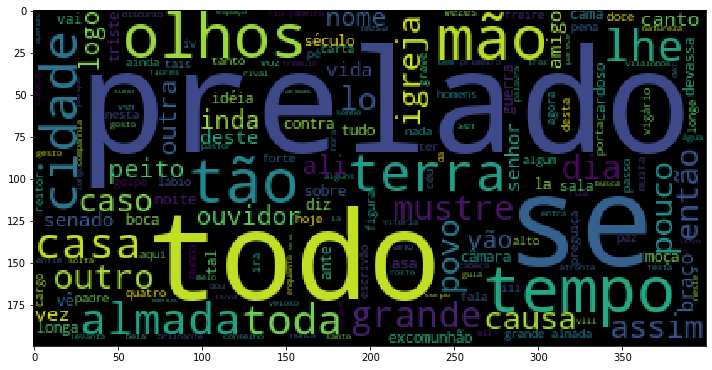

In [78]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(wordcloud, interpolation='nearest')
plt.tight_layout()

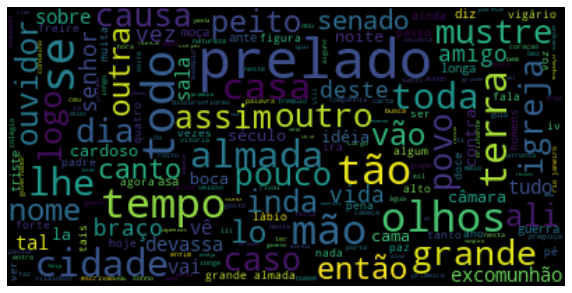

In [79]:
# lower max_font_size
wordcloud = WordCloud(max_font_size=40).generate(cleaned)
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

Finding ocurrences of an expression:

In [136]:
expression = ' olhos '
pos = 0 
positions = []
while pos != -1:
    position = cleaned.find(expression,pos+1)
    pos = position
    positions.append(position)
positions.pop()
print('A expressão foi encontrada {} vezes'.format(len(positions)))

A expressão foi encontrada 46 vezes


O contexto da palavra "olhos":

In [137]:
# Python puro
window = 20
for position in positions[0:10]:
    print(cleaned[position - window:position + window + len(expression)].strip())

guiça estremece abre olhos custo custo língua m
ngresso casa prelado olhos surge ali descendo g
as casa prelado come olhos devora inda faminto
campo voando batalha olhos pascia sangue satisf
a prelado arde furor olhos pensativos leva meio
o revolve fera culpa olhos fita pensa repentino
a fina senhoril bela olhos tinha-os cor incerta
ste rude uns simples olhos ofendia chegava cora
amor daqueles belos olhos derrotar prometia es
ente plácida caminha olhos chão corpilho veste


In [138]:
# Using NLTK
tknzr = nltk.tokenize.WordPunctTokenizer()
tokens = tknzr.tokenize(cleaned)
nltk_text = nltk.Text(tokens)
nltk_text.concordance(expression.lower(), width=120, lines=10)

no matches


Palavras que ocorrem em contextos similares:

In [139]:
nltk_text.similar(expression)

No matches


Below we are using [Pointwise Mutual Information](http://en.wikipedia.org/wiki/Pointwise_mutual_information).

In [165]:
max_items = 30
freq_min_b = 10
bigram_measures = nltk.collocations.BigramAssocMeasures()
finder2 = nltk.collocations.BigramCollocationFinder.from_words(nltk_text)
finder2.apply_word_filter(lambda w: w in string.punctuation)
finder2.apply_freq_filter(freq_min_b)
for a, b in finder2.nbest(bigram_measures.pmi, max_items):
    print(a, b)

rio janeiro
co 
grande almada


In [164]:
for a, b in (finder2.above_score(bigram_measures.raw_freq, 1000.0 / len(list(nltk.bigrams(tokens))))):
        print(a, b)

In [162]:
max_items = 30
freq_min_t = 6
trigram_measures = nltk.collocations.TrigramAssocMeasures()
finder3 = nltk.collocations.TrigramCollocationFinder.from_words(nltk_text)
finder3.apply_word_filter(lambda w: w in string.punctuation)
finder3.apply_ngram_filter(lambda w1, w2, w3:  w1 in ['da', 'de', 'das'])
finder3.apply_freq_filter(freq_min_t)
for a, b, c in finder3.nbest(trigram_measures.pmi, max_items):
    print(a, b, c)

In [161]:
for a, b, c in finder3.above_score(trigram_measures.raw_freq,100.0 / len(list(nltk.trigrams(tokens)))):
        print (a, b, c)

In [147]:
from nltk.util import ngrams
n = 4
xgrams = ngrams(tokens, n)
xgrams_counter = Counter(xgrams)
xgrams_counter.most_common(3000)

[(('dr', 'manuel', 'sousa', 'almada'), 2),
 (('manuel', 'sousa', 'almada', 'presbítero'), 2),
 (('sousa', 'almada', 'presbítero', 'hábito'), 2),
 (('almada', 'presbítero', 'hábito', 'pedro'), 2),
 (('entrega', 'devassa', 'prazo', 'três'), 2),
 (('devassa', 'prazo', 'três', 'dias'), 2),
 (('reitor', 'colégio', 'dom', 'abade'), 2),
 (('poupar', 'reverendas', 'plantas', 'subida'), 2),
 (('reverendas', 'plantas', 'subida', 'íngreme'), 2),
 (('plantas', 'subida', 'íngreme', 'ladeira'), 2),
 (('deste', 'modo', 'fala', '\x93'), 2),
 (('-', 'do', '-', 'mato'), 2),
 (('pés', 'vão', 'prelado', 'rojar'), 2),
 (('vão', 'prelado', 'rojar', '-'), 2),
 (('causa', 'sujeitar', 'régio', 'voto'), 2),
 (('tombo', 'terras', 'municipais', 'tom'), 2),
 (('terras', 'municipais', 'tom', 'pág'), 2),
 (('poesia', 'almada', '1910', 'almada'), 1),
 (('almada', '1910', 'almada', 'texto'), 1),
 (('1910', 'almada', 'texto', '-'), 1),
 (('almada', 'texto', '-', 'fonte'), 1),
 (('texto', '-', 'fonte', 'poesias'), 1),
 

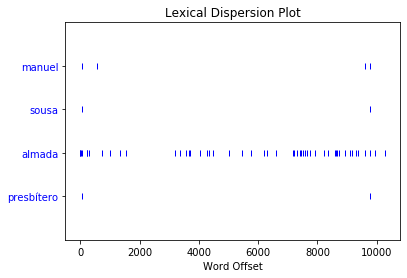

In [148]:
dispersion_words = ['manuel', 'sousa', 'almada', 'presbítero']
nltk_text.dispersion_plot(dispersion_words)

Visualizando a frequência das palavras:

In [149]:
freqdist.most_common(100)

[('prelado', 77),
 ('almada', 49),
 ('olhos', 46),
 ('grande', 45),
 ('tão', 44),
 ('tempo', 42),
 ('casa', 38),
 ('cidade', 35),
 ('terra', 34),
 ('todos', 30),
 ('toda', 29),
 ('igreja', 27),
 ('mustre', 26),
 ('mãos', 26),
 ('todo', 25),
 ('deste', 23),
 ('caso', 23),
 ('assim', 23),
 ('canto', 22),
 ('ouvidor', 22),
 ('causa', 22),
 ('então', 22),
 ('pouco', 22),
 ('povo', 22),
 ('inda', 21),
 ('logo', 21),
 ('dias', 20),
 ('ali', 20),
 ('nome', 19),
 ('vez', 19),
 ('senado', 19),
 ('vão', 19),
 ('mão', 19),
 ('outros', 18),
 ('tais', 18),
 ('tudo', 18),
 ('vida', 18),
 ('peito', 18),
 ('vezes', 18),
 ('devassa', 17),
 ('tal', 17),
 ('desta', 17),
 ('sobre', 17),
 ('ira', 17),
 ('senhor', 17),
 ('noite', 16),
 ('vai', 16),
 ('sala', 16),
 ('boca', 16),
 ('iii', 15),
 ('excomunhão', 15),
 ('câmara', 15),
 ('reitor', 15),
 ('cardoso', 15),
 ('contra', 15),
 ('diz', 15),
 ('golpe', 15),
 ('hoje', 14),
 ('doce', 14),
 ('asas', 14),
 ('algum', 14),
 ('veloso', 14),
 ('quatro', 14),
 ('t

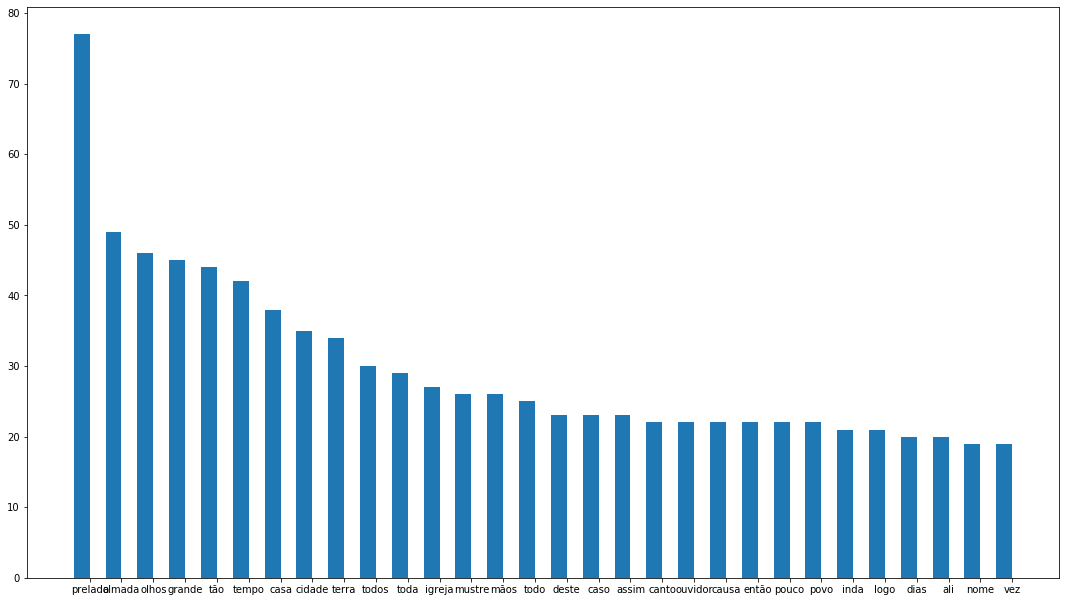

In [150]:
labels, values = zip(*freqdist.most_common(30))

indexes = np.arange(len(labels))
width = 0.5

plt.bar(indexes, values, width)
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
plt.xticks(indexes + width * 0.5, labels)
plt.show()

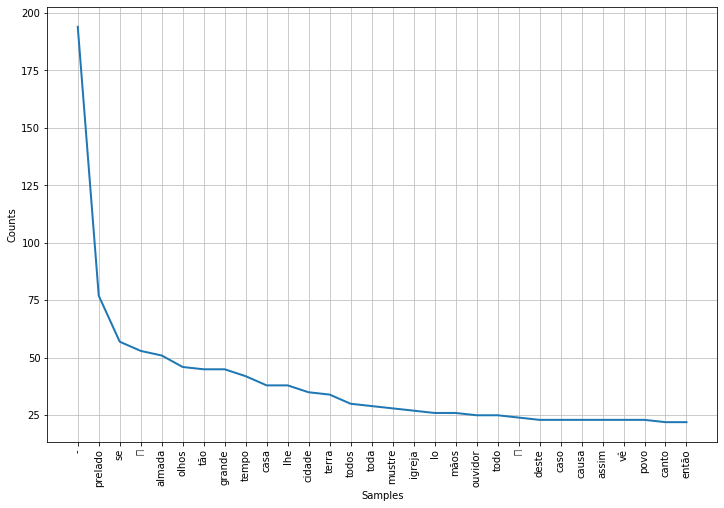

In [151]:
fd_words = nltk.FreqDist(tokens)
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(12,8)) 
fd_words.plot(30);

Distribuição de Frequência:

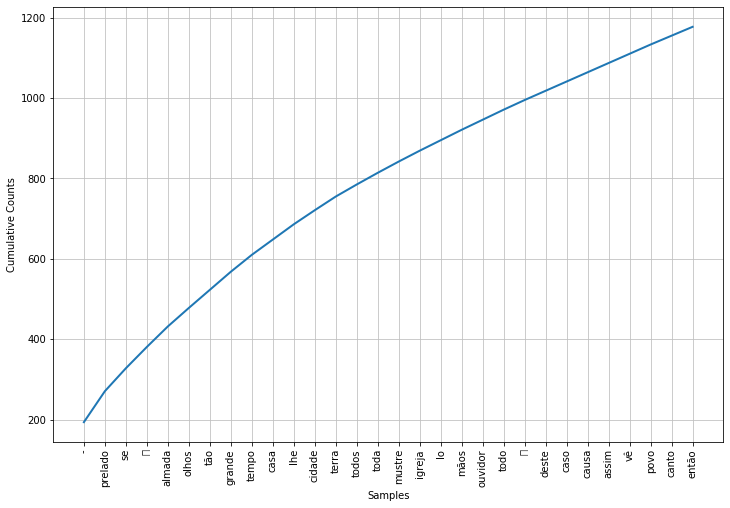

In [152]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(12,8)) 
fd_words.plot(30, cumulative = True)